In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures



In [2]:
data= pd.read_csv("/Users/macbookair/Documents/PYTHON/Projects/ML-with-Python/data/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
data["Class"].value_counts(normalize= True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Fraud')

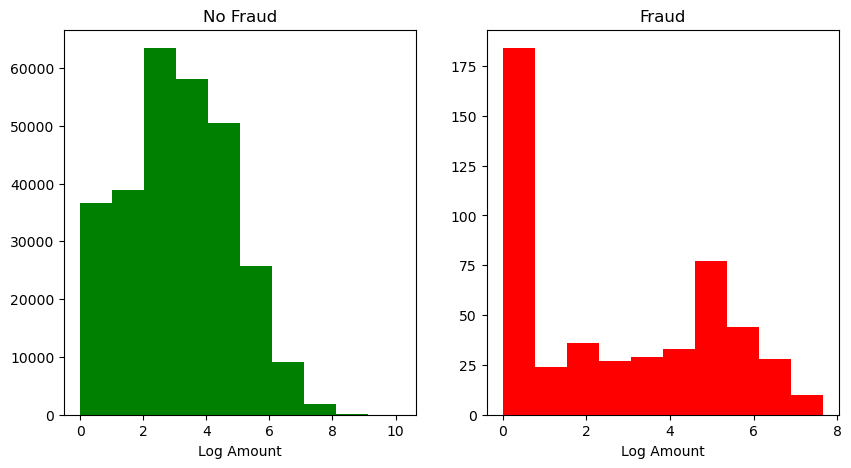

In [7]:
fig, ax= plt.subplots(1,2, figsize= (10, 5))
ax[0].hist(np.log(data.loc[data["Class"] == 0, "Amount"] +1), label= "No Fraud", color= "green")
ax[0].set_xlabel("Log Amount")
ax[0].set_title("No Fraud")

ax[1].hist(np.log(data.loc[data["Class"] == 1, "Amount"] +1), label= "No Fraud",color= "red")
ax[1].set_xlabel("Log Amount")
ax[1].set_title("Fraud")



In [8]:
data["log_amount"]= np.log(data["Amount"] + 1)

In [9]:
data.drop(["Time", "Amount"], axis= 1, inplace= True)

In [10]:
X= data.drop("Class", axis= 1)
y= data["Class"]

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 23, stratify= y)

In [12]:
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))


Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [13]:
lr= LogisticRegression(max_iter= 1000)
lr.fit(X_train, y_train)
print("Accuracy: ", lr.score(X_test, y_test)) ### It is problematic to use this evaluation metric
y_pred= lr.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9992099996488887
Confusion Matrix: 
 [[56853    11]
 [   34    64]]
F1 Score:  0.7398843930635838
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.65      0.74        98

    accuracy                           1.00     56962
   macro avg       0.93      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
precision, recall, thresholds= precision_recall_curve(y_test, lr.predict_proba(X_test)[:, 1])

Text(0.5, 1.0, 'Precision Recall Curve')

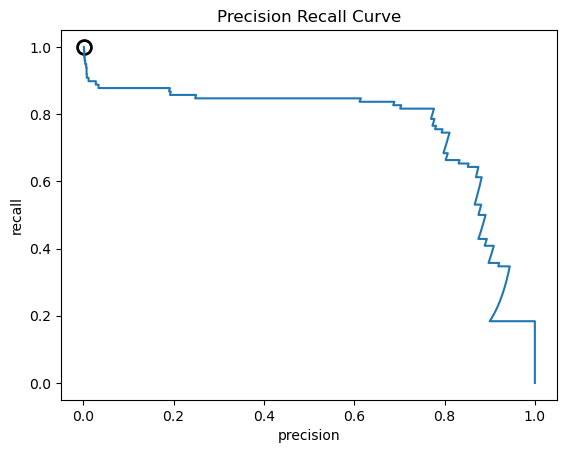

In [15]:
apprx_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[apprx_zero], recall[apprx_zero], 'o', markersize=10, fillstyle="none", c='k', mew=2)
plt.plot(precision, recall)
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("Precision Recall Curve")

In [16]:
svc= SVC(C= 100)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9995259997893332

In [17]:
y_pred= svc.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[56859     5]
 [   22    76]]
F1 Score:  0.8491620111731844
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
precision_svc, recall_svc, thresholds_svc= precision_recall_curve(y_test, svc.decision_function(X_test))

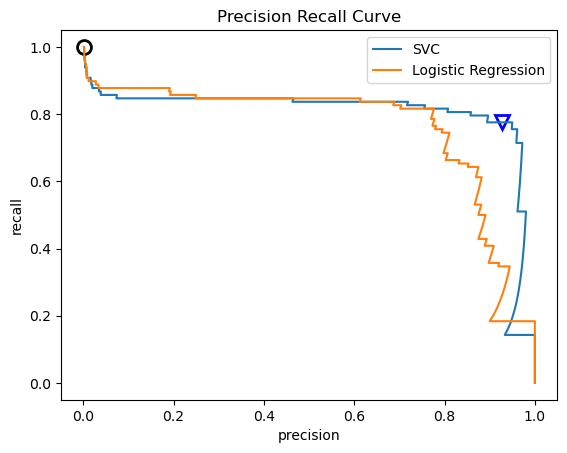

In [19]:
apprx_zero_svc = np.argmin(np.abs(thresholds_svc))
plt.plot(precision_svc[apprx_zero_svc], recall_svc[apprx_zero_svc], 'v', markersize=10, fillstyle="none", c='b', mew=2)
plt.plot(precision_svc, recall_svc, label= "SVC")
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("Precision Recall Curve")
plt.plot(precision[apprx_zero], recall[apprx_zero], 'o', markersize=10, fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label= "Logistic Regression")
plt.legend()



In [20]:
aps_lr = average_precision_score(y_test, lr.predict_proba(X_test)[:, 1])
aps_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("average precision of Logistic Regression %f" % aps_lr)
print("average precision of svc: %f" % aps_svc)

average precision of Logistic Regression 0.764085
average precision of svc: 0.811650


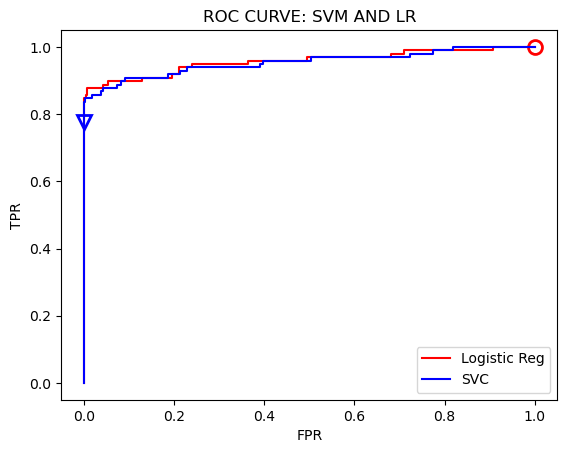

In [21]:
fpr_svc, tpr_scv, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))
fpr_lr, tpr_lr, thresholds_lr= roc_curve(y_test, lr.predict_proba(X_test)[:,1])
optimal_lr= np.argmin(np.abs(thresholds_lr))
optimal_svc= np.argmin(np.abs(thresholds_svc))
plt.plot(fpr_svc[optimal_svc], tpr_scv[optimal_svc], 'v', markersize=10, fillstyle="none", c='b', mew=2)
plt.plot(fpr_lr[optimal_lr], tpr_lr[optimal_lr], 'o', markersize=10, fillstyle="none", c='r', mew=2)
plt.plot(fpr_lr, tpr_lr, label= "Logistic Reg", c= "r")
plt.plot(fpr_svc, tpr_scv, label= "SVC", c= "b")
plt.title("ROC CURVE: SVM AND LR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()



In [22]:
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Logistic Regression: %f" % lr_auc)
print("AUC for SVC: %f" % svc_auc)

AUC for Logistic Regression: 0.956450
AUC for SVC: 0.953221


In [23]:
sdgc= SGDClassifier()
sdgc.fit(X_train, y_train)
sdgc.score(X_test, y_test)

0.9990871107053826

In [24]:
y_pred= sdgc.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[56850    14]
 [   38    60]]
F1 Score:  0.6976744186046512
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.61      0.70        98

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
aps_lr = average_precision_score(y_test, lr.predict_proba(X_test)[:, 1])
aps_svc = average_precision_score(y_test, svc.decision_function(X_test))
aps_sdgc= average_precision_score(y_test, sdgc.decision_function(X_test))
print("average precision of Logistic Regression %f" % aps_lr)
print("average precision of svc: %f" % aps_svc)
print("average precision of SDGC: %f" % aps_sdgc)

average precision of Logistic Regression 0.764085
average precision of svc: 0.811650
average precision of SDGC: 0.636145


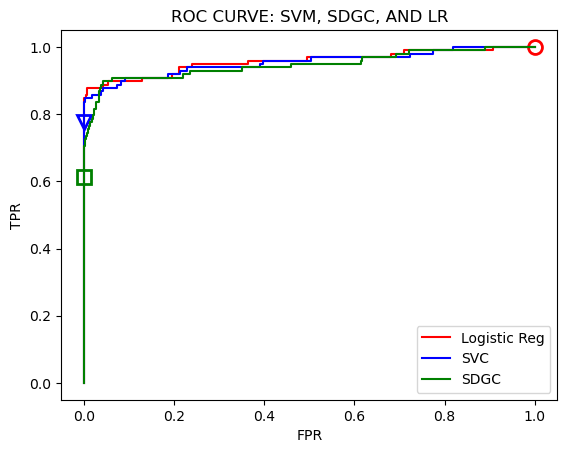

In [26]:
fpr_sdgc, tpr_sdgc, thresholds_sdgc= roc_curve(y_test, sdgc.decision_function(X_test))
fpr_svc, tpr_scv, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))
fpr_lr, tpr_lr, thresholds_lr= roc_curve(y_test, lr.predict_proba(X_test)[:,1])
optimal_lr= np.argmin(np.abs(thresholds_lr))
optimal_svc= np.argmin(np.abs(thresholds_svc))
optimal_sdgc= np.argmin(np.abs(thresholds_sdgc))

plt.plot(fpr_svc[optimal_svc], tpr_scv[optimal_svc], 'v', markersize=10, fillstyle="none", c='b', mew=2)
plt.plot(fpr_lr[optimal_lr], tpr_lr[optimal_lr], 'o', markersize=10, fillstyle="none", c='r', mew=2)
plt.plot(fpr_sdgc[optimal_sdgc], tpr_sdgc[optimal_sdgc], 's', markersize=10, fillstyle="none", c='g', mew=2)


plt.plot(fpr_lr, tpr_lr, label= "Logistic Reg", c= "r")
plt.plot(fpr_svc, tpr_scv, label= "SVC", c= "b")
plt.plot(fpr_sdgc, tpr_sdgc, label= "SDGC", c= "g")
plt.title("ROC CURVE: SVM, SDGC, AND LR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()


In [27]:
auc_sdgc= roc_auc_score(y_test, sdgc.decision_function(X_test))
auc_lr= roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_svc= roc_auc_score(y_test, svc.decision_function(X_test))

print("AUC SDGC: %f" % auc_sdgc)
print("AUC LR: %f" % auc_lr)
print("AUC SVC: %f" % auc_svc)



AUC SDGC: 0.946277
AUC LR: 0.956450
AUC SVC: 0.953221


In [ ]:
estimator= LogisticRegression()
score= cross_val_score(estimator, X_train, y_train, scoring= "roc_auc", cv= 5)
print(score)



[0.98234196 0.99026911 0.97241486 0.98683784 0.97649671]


In [29]:
np.mean(score)

np.float64(0.9816720944613865)

In [37]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring= "roc_auc")
grid.fit(X_train, y_train)


,estimator,Pipeline(step...egression())])
,param_grid,"{'logisticregression__C': [0.01, 0.1, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [33]:
print(grid.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.1))])


In [35]:
print(grid.best_estimator_.named_steps["logisticregression"])

LogisticRegression(C=0.1)


In [36]:
print(grid.best_estimator_.named_steps["logisticregression"].coef_)

[[ 0.05364362 -0.06159119  0.01213181  0.87330766  0.08610325 -0.10470942
  -0.01090479 -0.25126826 -0.27883471 -0.67911469 -0.03710541 -0.04946585
  -0.28877273 -0.61681564 -0.10992463 -0.27988312  0.06035122 -0.01086402
  -0.06400474 -0.17581061  0.26299497  0.40129126 -0.0795911   0.15193411
  -0.09152814 -0.03748471 -0.1524196  -0.02399179  0.15711338]]


In [38]:
grid.best_params_

{'logisticregression__C': 0.01}

In [ ]:
grid.score(X_test, y_test)

0.9671328224593158

In [42]:
roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])

0.9671328224593158

In [47]:
pipe = make_pipeline(
    StandardScaler(), 
    PolynomialFeatures(), 
    RidgeClassifier(class_weight= "balanced")
)

param_grid = {
    'polynomialfeatures__degree': [1, 2], 
    'ridgeclassifier__alpha': [0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc")

grid.fit(X_train, y_train)

print(f"Best Params: {grid.best_params_}")
print(f"Test ROC-AUC: {grid.score(X_test, y_test):.4f}")

Best Params: {'polynomialfeatures__degree': 2, 'ridgeclassifier__alpha': 100}
Test ROC-AUC: 0.9793


array([0, 1])

References:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics